In [4]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 1.14.0


In [5]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90
)

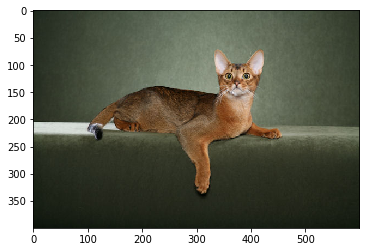

In [6]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


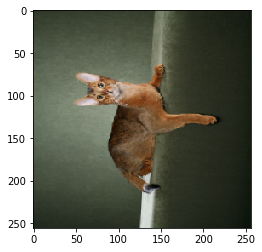

In [7]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-50, -50, 0, 50, 50],
    height_shift_range = [-50, 0, 50]
)

Found 1 images belonging to 1 classes.


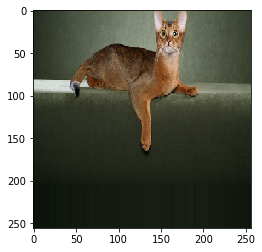

In [9]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


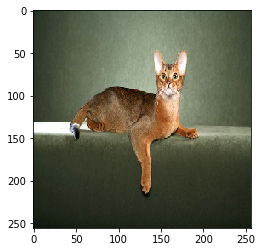

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


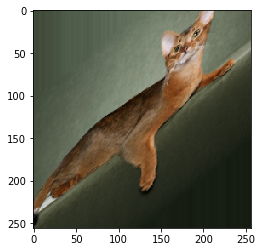

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=90
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


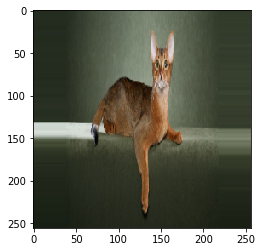

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.4, 1.5]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


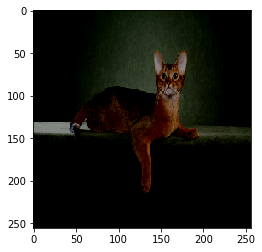

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 128
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


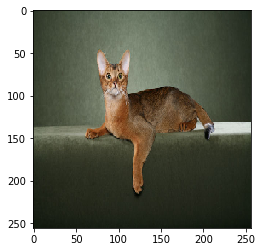

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = False
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

In [16]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.04700141 0.75347793 [[5]]
120.70756512369792


In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-1.1920929e-07 1.0 [[4]]


In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale  = 1,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [20]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [21]:
print(x.mean(), x.std(), y)

-0.33814082 0.31547773 [[6]]


In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 45,
    channel_shift_range = 100
)

In [23]:
model = tf.keras.models.Sequential([
        tf.keras.applications.mobilenet_v2.MobileNetV2(
            include_top = False, input_shape=(32,32,3),
            pooling='avg'
        ),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Akhilash\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [24]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs=1, steps_per_epoch=10
)

10/10 [==============================] - 17s 2s/step - loss: 2.4725 - acc: 0.1094
